# Plotting Band Structure Stuff

In [101]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import pandas as pd 

%config InlineBackend.figure_formats = ['svg']

In [210]:
def band_structure_gen(file_path):

    with open(file_path, "r") as f:
        lines = f.readlines()
    data = [[[],[]]]
    counter = 0 
    for index, line in enumerate(lines):
        row_data = line.strip() 
        if row_data == "":
            counter += 1 
            data.append([[],[]])
            continue 
        row_data = row_data.split()
        data[counter][0].append(float(row_data[0]))
        data[counter][1].append(float(row_data[1]))
    
    return data 

def remove_bands_energy_range(data, E_min, E_max):
    """ removes bands with energies outside of this range """
    data_new = [[[], []]]
    counter = 0 
    for deets in data:
        if deets[1] == []:
            continue 
        max_value = max(deets[1])
        min_value = min(deets[1])
        
        if max_value > E_max + 5 or min_value < E_min - 5:
            continue 
        else: 
            data_new[counter][0] = deets[0]
            data_new[counter][1] = deets[1]
            counter += 1 
            data_new.append([[],[]])
    return data_new

def plot_bands(data, fermi_energy, E_min, E_max, colormap = "viridis", kpath = 'MGM', filename = 'eucd2as2'):
    
    # generate colors 
    n_bands = len(data)
    colors = plt.get_cmap(colormap, n_bands)
    custom_palette = [mpl.colors.rgb2hex(colors(i)) for i in range(colors.N)]
    
    for index, deets in enumerate(data):
        y_axis = [x - fermi_energy for x in deets[1]]
        plt.plot(deets[0], y_axis, color = custom_palette[index], linewidth = 1.5)
    
    plt.ylabel("E - E$_F$ (eV)")
    plt.ylim(E_min - fermi_energy, E_max - fermi_energy)
    plt.xlim(0.0, data[0][0][-1])
                             
    # plotting horizontal line fermi 
    data_length = len(data[0][0])
    y_zeros = np.zeros(data_length)
    plt.plot(data[0][0], y_zeros, linestyle = '--', color = 'black', linewidth = 1)
    
    # plotting vertical lines 
    midpoint = (data[0][0][-1] - data[0][0][0])/2
    
    #x_zeros = np.zeros(data_length)
    x_mids = np.full(data_length, midpoint)
    #x_last = np.full(data_length, data[0][0][-1])
    
    y_vals = np.linspace(E_min - fermi_energy, E_max - fermi_energy, data_length)
    
    #plt.plot(x_zeros, y_vals, color = 'black', linewidth = 1)
    plt.plot(x_mids, y_vals, color = 'black', linewidth = 1)
    #plt.plot(x_last, y_vals, color = 'black', linewidth = 1)
    
    #plt.gca().xaxis.set_tick_params(labelbottom=False)
    #plt.gca().set_xticks([])
    width = data[0][0][-1] - data[0][0][0]
    height = E_max - E_min
    plt.gca().set_aspect(width/height * 1.25)
    
    if kpath == 'MGM':
        plt.gca().set_xticks([0, midpoint, data[0][0][-1]])
        plt.gca().set_xticklabels(['M','$\Gamma$','M'])
        
    elif kpath == 'KGK':
        plt.gca().set_xticks([0, midpoint, data[0][0][-1]])
        plt.gca().set_xticklabels(['K','$\Gamma$','K'])
        
    elif kpath == 'AGA':
        plt.gca().set_xticks([0, midpoint, data[0][0][-1]])
        plt.gca().set_xticklabels(['A','$\Gamma$','A'])
    
    else: 
        plt.gca().set_aspect(width/height / 2)
    plt.savefig(filename + '_' + kpath + '.pdf', bbox_inches = 'tight')

    
def plot_bandstructure(file_path, fermi_energy, E_min, E_max, kpath = 'MGM', filename = 'eucd2as2', colormap = 'viridis'):
    data = band_structure_gen(file_path)
    data = remove_bands_energy_range(data, E_min, E_max)
    plot_bands(data, fermi_energy, E_min, E_max, colormap, kpath, filename)

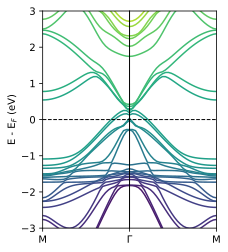

In [199]:
plot_bandstructure("./eucd2as2_MGM.bands.dat.gnu", 9.73, 9.73 - 3, 9.73 + 3, kpath = 'MGM', filename = 'eucd2as2', colormap = 'viridis')

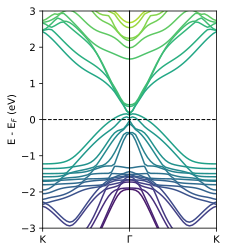

In [201]:
plot_bandstructure("./eucd2as2_KGK.bands.dat.gnu", 9.73, 9.73 - 3, 9.73 + 3, kpath = 'KGK', filename = 'eucd2as2', colormap = 'viridis')

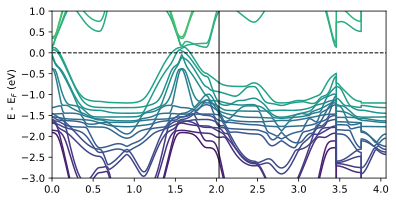

In [209]:
plot_bandstructure('./eucd2as2.bands.dat.gnu', 9.75, 9.75 - 3, 10.75, kpath = 'NAN', filename = 'eucd2as2', colormap = 'viridis')